In [46]:
# diamots

In [2]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df_diamonds= pd.read_csv("..\data\diamonds_train.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\paul_\AppData\Local\Temp\ipykernel_79436\1857739754.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_diamonds= pd.read_csv("..\data\diamonds_train.csv")


In [4]:
df_diamonds

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1
...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,Antwerp,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1
40451,12615,2.02,Madrid,57.1,60.0,8.31,8.25,4.73,Good,F,SI2
40452,5457,1.01,Kimberly,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1
40453,456,0.33,Kimberly,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1


In [5]:
df_diamonds.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [6]:
diamonds_nan=df_diamonds.dropna(axis=0)

In [7]:
diamonds_nan

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1
...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,Antwerp,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1
40451,12615,2.02,Madrid,57.1,60.0,8.31,8.25,4.73,Good,F,SI2
40452,5457,1.01,Kimberly,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1
40453,456,0.33,Kimberly,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1


In [26]:
diamons_encoded= pd.get_dummies(df_diamonds, columns=["city","cut","color","clarity"], dtype=int)
diamons_encoded

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,0,1,0,...,0,0,0,0,0,0,1,0,0,0
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [24]:
diamons_encoded.describe()

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154,0.061426,0.124756,0.063305,...,0.099666,0.052898,0.013917,0.032802,0.240984,0.171277,0.149944,0.228600,0.068570,0.093907
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062,0.240114,0.330446,0.243514,...,0.299558,0.223833,0.117147,0.178120,0.427686,0.376755,0.357021,0.419936,0.252725,0.291703
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
check_df.to_csv('archivo.csv', index=False)

In [92]:
x= diamons_encoded.drop('price', axis=1)
y = diamons_encoded['price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 39), X_test: (8091, 39), y_train: (32364,), y_test: (8091,)


In [95]:
from sklearn.tree import DecisionTreeRegressor
melboarme_model = DecisionTreeRegressor()
melboarme_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [121]:
df_diamonds_test= pd.read_csv("..\data\diamonds_test.csv")
df_diamonds_test

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\paul_\AppData\Local\Temp\ipykernel_79436\1061025529.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_diamonds_test= pd.read_csv("..\data\diamonds_test.csv")


,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [120]:
diamons_df_test1= pd.get_dummies(df_diamonds_test, columns=["city","cut","color","clarity"], dtype=int)
diamons_df_test1

,id,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,13482,0.70,61.6,55.0,5.75,5.71,3.53,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,13483,0.70,58.8,57.0,5.85,5.89,3.45,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
x_test2 =diamons_df_test1.drop(columns=["id"])
x_test2diamonds_nan

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,0.70,61.6,55.0,5.75,5.71,3.53,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,0.70,58.8,57.0,5.85,5.89,3.45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
y_predic_test = forest_model.predict(x_test2)
y_predic_test

array([2976.56, 5434.84, 9191.39, ..., 2885.78, 2179.64,  821.33])

In [117]:
column_names = ["price"]
check_df = pd.DataFrame(y_predic_test, columns=column_names, index=diamons_df_test1['id'])
check_df.reset_index(inplace=True)
check_df

,id,price
0,0,2976.56
1,1,5434.84
2,2,9191.39
3,3,4028.24
4,4,1747.94
...,...,...
13480,13480,1655.59
13481,13481,2492.69
13482,13482,2885.78
13483,13483,2179.64


In [118]:
check_df.to_csv('archivo.csv', index=False)

In [ ]:
###compruebo las 5 primeras filas

In [96]:
print("Predic diamantes")
print(x.head())
print("Precio real diamantes")
print(y.head())
print("las predicciones son")
print(melboarme_model.predict(x.head()))

Predic diamantes
   carat  depth  table     x     y     z  city_Amsterdam  city_Antwerp  \
0   1.21   62.4   58.0  6.83  6.79  4.25               0             0   
1   0.32   63.0   57.0  4.35  4.38  2.75               0             0   
2   0.71   65.5   55.0  5.62  5.53  3.65               0             0   
3   0.41   63.8   56.0  4.68  4.72  3.00               0             0   
4   1.02   60.5   59.0  6.55  6.51  3.95               0             0   

   city_Dubai  city_Kimberly  ...  color_I  color_J  clarity_I1  clarity_IF  \
0           1              0  ...        0        1           0           0   
1           0              1  ...        0        0           0           0   
2           0              0  ...        0        0           0           0   
3           0              1  ...        0        0           0           0   
4           1              0  ...        0        0           0           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_

In [45]:
## MAE(para ver el error absoluto)

In [97]:
from sklearn.metrics import mean_absolute_error
predice_prices=melboarme_model.predict(x)
mean_absolute_error(y, predice_prices)

73.20621678408108

In [ ]:
#entrenamos el modelo

In [99]:
x= diamons_encoded.drop('price', axis=1)
y = diamons_encoded['price']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32364, 39), X_test: (8091, 39), y_train: (32364,), y_test: (8091,)


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
melboarme_model = DecisionTreeRegressor()
melboarme_model.fit(x_train, y_train)
val_predic = melboarme_model.predict(x_test)
print(mean_absolute_error(y_test, val_predic))


370.58023531738183


In [ ]:
# mae

In [103]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test ):
    model= DecisionTreeRegressor(max_leaf_nodes= max_leaf_nodes)
    model.fit(x_train, y_train)
    preds_val = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [105]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae =get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test )
    print("max leaf mode: %d \t\t mean absolute error: %d" % (max_leaf_nodes, my_mae))

max leaf mode: 5 		 mean absolute error: 957
max leaf mode: 50 		 mean absolute error: 528
max leaf mode: 500 		 mean absolute error: 375
max leaf mode: 5000 		 mean absolute error: 366


In [106]:
#from sklearn.ensemble import RandomForestRegressor
forest_model =RandomForestRegressor()
forest_model.fit(x_train, y_train)
meld_preds = forest_model.predict(x_test)
print(mean_absolute_error(y_test, meld_preds))

277.3663441175363


In [88]:
# Random Forest Regressor

param_grid = {'n_estimators': [100, 200, 300],  # Number of trees in the forest.
              'max_depth': [None, 3, 10],  # Maximum depth of the trees.
              'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node.
              'min_samples_leaf': [1, 4],  # Minimum number of samples required to be at a leaf node.
              'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split.
              }

In [89]:
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

NameError: name 'model' is not defined

In [85]:
%%time

grid_search.fit(X,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

NameError: name 'grid_search' is not defined

ValueError: x and y must be the same size

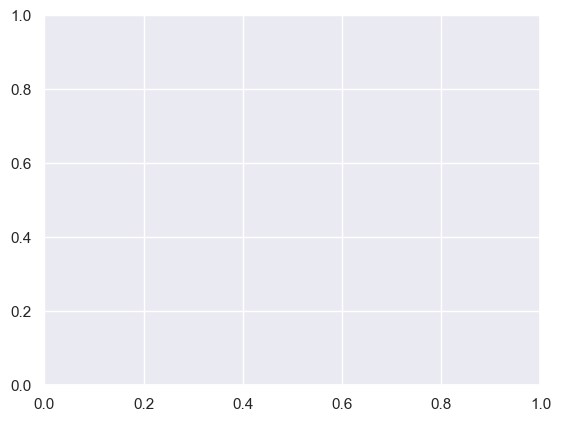

In [31]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()